/home/franchb/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/franchb/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


<IPython.core.display.Javascript object>


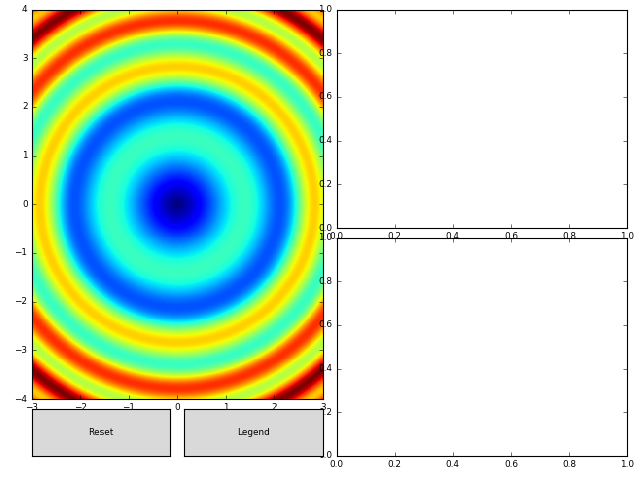

<IPython.core.display.Javascript object>


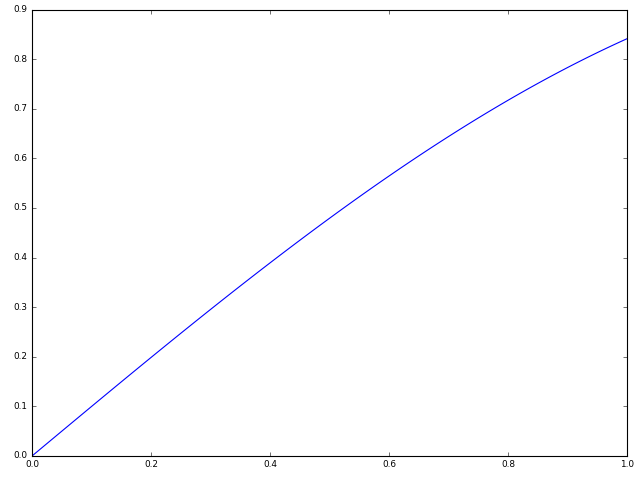

In [6]:
# License: Creative Commons Zero (almost public domain) http://scpyce.org/cc0

"""
Example usage of matplotlibs widgets: Build a small 2d Data viewer.

Shows 2d-data as a pcolormesh, a click on the image shows the crossection
(x or y, depending on the mouse button) and draws a corresponding line in
the image, showing the location of the crossections. A reset button deletes all
crossections plots.

Works with matplotlib 1.0.1.
"""
%matplotlib notebook
from matplotlib.widgets import Cursor, Button
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size']=8

class viewer_2d(object):
    def __init__(self,z,x=None, y=None):
        """
        Shows a given array in a 2d-viewer.
        Input: z, an 2d array.
        x,y coordinters are optional.
        """
        if x==None:
            self.x=np.arange(z.shape[0])
        else:
            self.x=x
        if y==None:
            self.y=np.arange(z.shape[1])
        else:
            self.y=y
        self.z=z
        self.fig=plt.figure()
        #Doing some layout with subplots:
        self.fig.subplots_adjust(0.05,0.05,0.98,0.98,0.1)
        self.overview=plt.subplot2grid((8,4),(0,0),rowspan=7,colspan=2)
        self.overview.pcolormesh(self.x,self.y,self.z)
        self.overview.autoscale(1,'both',1)
        self.x_subplot=plt.subplot2grid((8,4),(0,2),rowspan=4,colspan=2)
        self.y_subplot=plt.subplot2grid((8,4),(4,2),rowspan=4,colspan=2)

        #Adding widgets, to not be gc'ed, they are put in a list:
        
        cursor=Cursor(self.overview, useblit=True, color='black', linewidth=2 )
        but_ax=plt.subplot2grid((8,4),(7,0),colspan=1)
        reset_button=Button(but_ax,'Reset')
        but_ax2=plt.subplot2grid((8,4),(7,1),colspan=1)
        legend_button=Button(but_ax2,'Legend')
        self._widgets=[cursor,reset_button,legend_button]
        #connect events
        reset_button.on_clicked(self.clear_xy_subplots)
        legend_button.on_clicked(self.show_legend)
        self.fig.canvas.mpl_connect('button_press_event',self.click)
    
    def show_legend(self, event):        
        """Shows legend for the plots"""
        for pl in [self.x_subplot,self.y_subplot]:
            if len(pl.lines)>0:
                pl.legend()
        plt.draw()

    def clear_xy_subplots(self,event):
        """Clears the subplots."""
        for j in [self.overview,self.x_subplot,self.y_subplot]:
            j.lines=[]
            j.legend_ = None
        plt.draw()


    def click(self,event):
        """
        What to do, if a click on the figure happens:
            1. Check which axis
            2. Get data coord's.
            3. Plot resulting data.
            4. Update Figure
        """
        if event.inaxes==self.overview:
            #Get nearest data
            xpos=np.argmin(np.abs(event.xdata-self.x))
            ypos=np.argmin(np.abs(event.ydata-self.y))
            
            #Check which mouse button:
            if event.button==1:
                #Plot it                
                c,=self.y_subplot.plot(self.y, self.z[:,xpos],label=str(self.x[xpos]))
                self.overview.axvline(self.x[xpos],color=c.get_color(),lw=2)

            elif event.button==3:
                #Plot it                
                c,=self.x_subplot.plot(self.x, self.z[ypos,:],label=str(self.y[ypos]))
                self.overview.axhline(self.y[ypos],color=c.get_color(),lw=2)

        if event.inaxes==self.y_subplot:
            ypos=np.argmin(np.abs(event.xdata-self.y))
            c=self.x_subplot.plot(self.x, self.z[ypos,:],label=str(self.y[ypos]))
            self.overview.axhline(self.y[ypos],color=c.get_color(),lw=2)

        if event.inaxes==self.x_subplot:
            xpos=np.argmin(np.abs(event.xdata-self.x))
            c,=self.y_subplot.plot(self.y, self.z[:,xpos],label=str(self.x[xpos]))
            self.overview.axvline(self.x[xpos],color=c.get_color(),lw=2)
        #Show it
        plt.draw()
        
if __name__=='__main__':
    #Build some strange looking data:
    x=np.linspace(-3,3,300)
    y=np.linspace(-4,4,400)
    X,Y=np.meshgrid(x,y)
    z=np.sqrt(X**2+Y**2)+np.sin(X**2+Y**2)
    w, h = 512, 512
    file = open('ct.raw', 'rb')
    s = file.read()
    A = np.fromstring(s, np.uint16).astype(float)
    A *= 1.0/max(A)
    A.shape = w, h
    #Put it in the viewer
    fig_v=viewer_2d(z,x,y)
    fig_v2=viewer_2d(A)
    #Show it
    plt.show()




In [4]:
datafile

'/home/franchb/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/sample_data/ct.raw'

In [1]:
from matplotlib.widgets import  RectangleSelector
from pylab import *

def onselect(eclick, erelease):
  'eclick and erelease are matplotlib events at press and release'
  print(' startposition : (%f, %f)' % (eclick.xdata, eclick.ydata))
  print(' endposition   : (%f, %f)' % (erelease.xdata, erelease.ydata))
  print(' used button   : ', eclick.button)

def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)

x = arange(100)/(99.0)
y = sin(x)
fig = figure
ax = subplot(111)
ax.plot(x,y)

toggle_selector.RS = RectangleSelector(ax, onselect, drawtype='line')
connect('key_press_event', toggle_selector)
show()

 startposition : (0.000000, 0.000000)
 endposition   : (0.000000, 0.000000)
 used button   :  1
 startposition : (0.223790, 0.114844)
 endposition   : (0.633065, 0.522656)
 used button   :  1
 startposition : (0.286290, 0.117188)
 endposition   : (0.612903, 0.447656)
 used button   :  1
 startposition : (0.286290, 0.117188)
 endposition   : (0.612903, 0.447656)
 used button   :  1
 startposition : (0.286290, 0.117188)
 endposition   : (0.612903, 0.447656)
 used button   :  1
 startposition : (0.286290, 0.117188)
 endposition   : (0.612903, 0.447656)
 used button   :  1
 startposition : (0.286290, 0.117188)
 endposition   : (0.612903, 0.447656)
 used button   :  1
 startposition : (0.189516, 0.053906)
 endposition   : (0.681452, 0.482812)
 used button   :  1
 startposition : (0.070565, 0.114844)
 endposition   : (0.633065, 0.782812)
 used button   :  1
 startposition : (0.080645, 0.243750)
 endposition   : (0.576613, 0.759375)
 used button   :  1
 startposition : (0.080645, 0.243750)
 e

In [3]:
"""
The SpanSelector is a mouse widget to select a xmin/xmax range and plot the
detail view of the selected region in the lower axes
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(211, axis_bgcolor='#FFFFCC')

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2*np.pi*x) + 0.5*np.random.randn(len(x))

ax.plot(x, y, '-')
ax.set_ylim(-2, 2)
ax.set_title('Press left mouse button and drag to test')

ax2 = fig.add_subplot(212, axis_bgcolor='#FFFFCC')
line2, = ax2.plot(x, y, '-')


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    ax2.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()

# set useblit True on gtkagg for enhanced performance
span = SpanSelector(ax, onselect, 'horizontal', useblit=True,
                    rectprops=dict(alpha=0.5, facecolor='red'))


plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0